# 📥 Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Dataset

In [2]:
df = pd.read_csv('smartphones_data.csv')

# Basic Information

In [3]:
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")

Shape: 3260 rows, 20 columns


In [4]:
print("\nColumn Types:")
print(df.dtypes)


Column Types:
brand_name               object
Name                     object
Price                     int64
RAM                     float64
OS                       object
storage                 float64
Battery_cap               int64
has_fast_charging        object
has_fingerprints         object
has_nfc                  object
has_5g                   object
processor_brand          object
num_core                float64
primery_rear_camera     float64
Num_Rear_Cameras          int64
primery_front_camera    float64
num_front_camera          int64
display_size(inch)      float64
refresh_rate(hz)        float64
display_types            object
dtype: object


In [5]:
print("\nSample Data:")
print(df.head(3))


Sample Data:
  brand_name                Name  Price  RAM       OS  storage  Battery_cap  \
0       vivo            vivo v50  34999  8.0  android    128.0         6000   
1     realme       realme p3 pro  21999  8.0  android    128.0         6000   
2     realme  realme 14 pro plus  27999  8.0  android    128.0         6000   

  has_fast_charging has_fingerprints has_nfc has_5g processor_brand  num_core  \
0               Yes              Yes      No    Yes      snapdragon       8.0   
1               Yes              Yes      No    Yes      snapdragon       8.0   
2               Yes              Yes      No    Yes      snapdragon       8.0   

   primery_rear_camera  Num_Rear_Cameras  primery_front_camera  \
0                 50.0                 2                  50.0   
1                 50.0                 2                  16.0   
2                 50.0                 3                  32.0   

   num_front_camera  display_size(inch)  refresh_rate(hz)   display_types  
0  

#   Check for Missing Values

In [6]:
missing = df.isnull().sum()
print(missing[missing > 0] if missing.any() else "No missing values.")

has_fingerprints     726
has_nfc              726
has_5g               726
num_core             175
refresh_rate(hz)    1731
dtype: int64


#  Visualize Missing Values

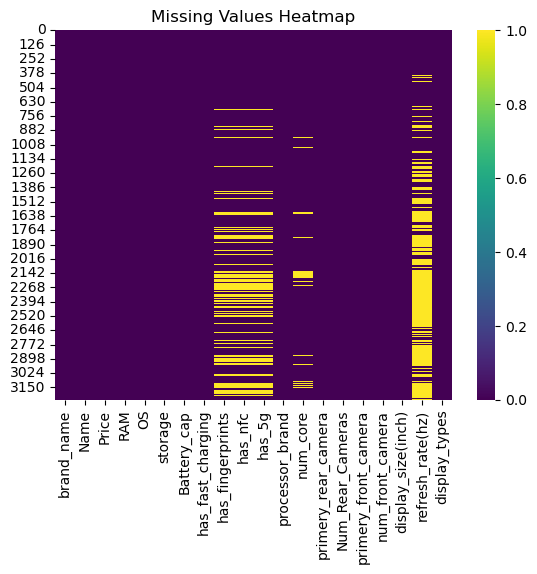

In [7]:
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


#  Handle Missing Values  &&
# Fill numerical features with median/mode

In [8]:
binary_cols = ['has_fast_charging', 'has_fingerprints', 'has_5g', 'has_nfc']
for col in binary_cols:
    df[col] = df[col].fillna('No')

df['num_core'] = df['num_core'].fillna(df['num_core'].median())
df['refresh_rate(hz)'] = df['refresh_rate(hz)'].fillna(df['refresh_rate(hz)'].mode()[0])

#  Confirm All Missing Values Handled

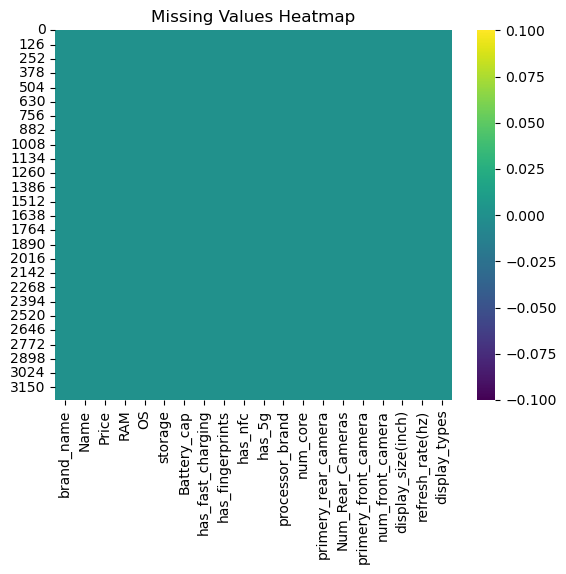

In [9]:
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


#  Check Duplicate Records



In [10]:
df.duplicated().sum()

0

#  Summary Statistics

In [11]:
df.describe(include='all')

,brand_name,Name,Price,RAM,OS,storage,Battery_cap,has_fast_charging,has_fingerprints,has_nfc,has_5g,processor_brand,num_core,primery_rear_camera,Num_Rear_Cameras,primery_front_camera,num_front_camera,display_size(inch),refresh_rate(hz),display_types
count,3260,3260,3260.000000,3260.000000,3260,3260.000000,3260.000000,3260,3260,3260,3260,3260,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260
unique,33,3260,NaN,NaN,3,NaN,NaN,2,2,2,2,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,samsung,vivo v50,NaN,NaN,android,NaN,NaN,No,Yes,No,No,mediatek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lcd display
freq,315,1,NaN,NaN,3130,NaN,NaN,1717,2391,2425,2257,1384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
mean,NaN,NaN,20181.384356,5.065874,NaN,112.040893,4163.485583,NaN,NaN,NaN,NaN,NaN,7.138037,32.655828,2.076994,12.555767,1.026994,6.097110,110.795706,NaN
std,NaN,NaN,24145.388368,3.256896,NaN,126.893532,1312.404904,NaN,NaN,NaN,NaN,NaN,1.649559,29.397695,0.990856,10.564795,0.162090,0.741478,19.675115,NaN
min,NaN,NaN,2500.000000,0.250000,NaN,0.310000,1100.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.300000,1.000000,0.300000,1.000000,2.400000,60.000000,NaN
25%,NaN,NaN,7490.000000,3.000000,NaN,32.000000,3007.500000,NaN,NaN,NaN,NaN,NaN,8.000000,12.000000,1.000000,5.000000,1.000000,5.500000,120.000000,NaN
50%,NaN,NaN,11999.000000,4.000000,NaN,64.000000,4500.000000,NaN,NaN,NaN,NaN,NaN,8.000000,16.000000,2.000000,8.000000,1.000000,6.455000,120.000000,NaN
75%,NaN,NaN,21999.000000,8.000000,NaN,128.000000,5000.000000,NaN,NaN,NaN,NaN,NaN,8.000000,50.000000,3.000000,16.000000,1.000000,6.670000,120.000000,NaN


#  Feature Engineering

In [12]:
df['is_flagship'] = df['Price'] > df['Price'].quantile(0.75)
df['price_per_ram'] = df['Price'] / df['RAM']
df['battery_value'] = df['Battery_cap'] / df['Price']
df['storage_ram_ratio'] = df['storage'] / df['RAM']


#  Clustering (K-Means)

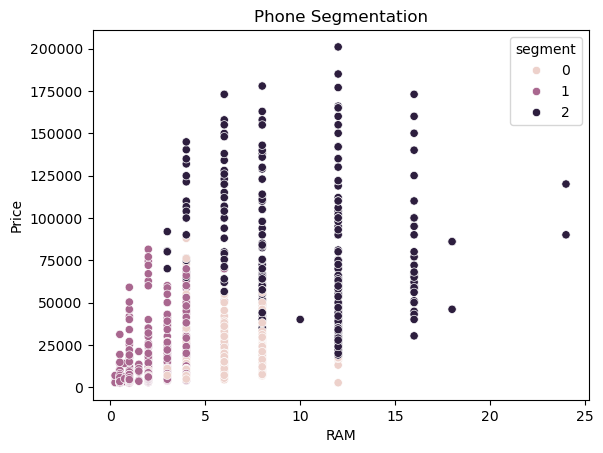

In [13]:
features = df[['Price', 'RAM', 'storage', 'Battery_cap']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['segment'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='RAM', y='Price', hue='segment', data=df)
plt.title("Phone Segmentation")
plt.show()


# Visualize Clusters by RAM and Price

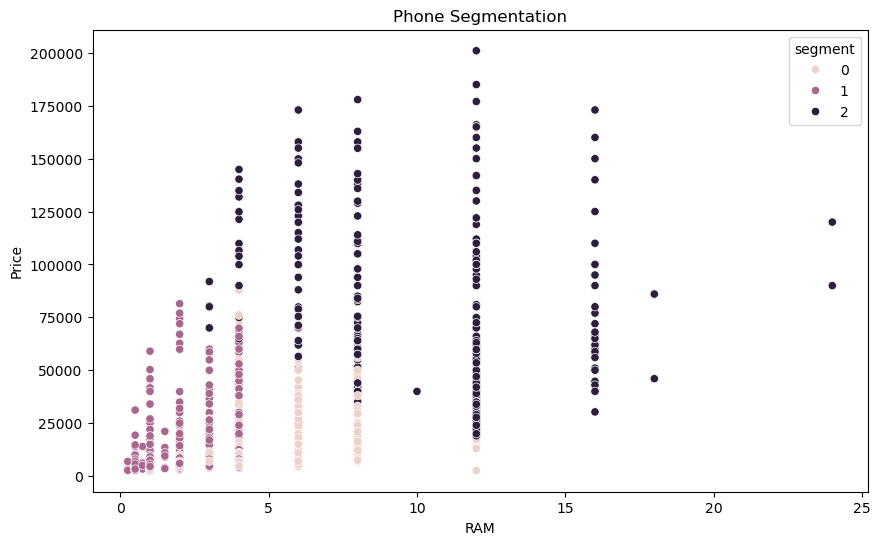

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Price', hue='segment', data=df)
plt.title("Phone Segmentation")
plt.show()


#  Feature Correlation Matrix

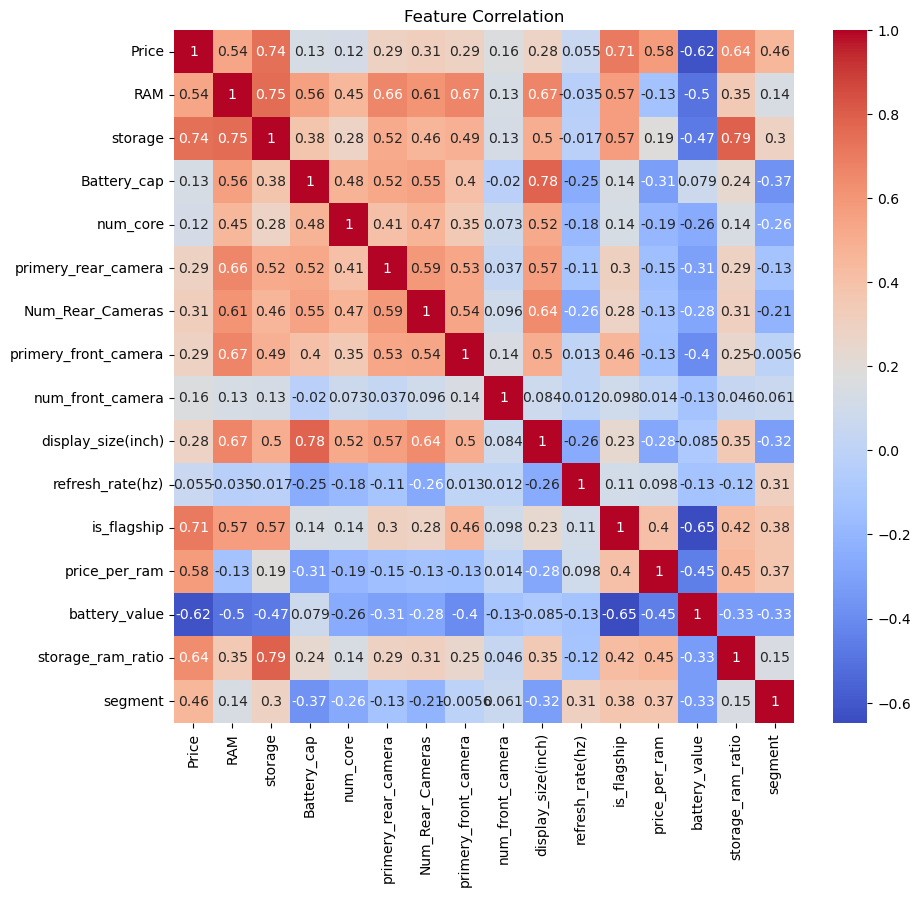

In [17]:
plt.figure(figsize=(10, 9))
correlation = df.corr(numeric_only=True)

sns.heatmap(correlation, annot=True, cmap='coolwarm')

plt.title("Feature Correlation")

plt.show()

#  Brand Distribution Across Segments

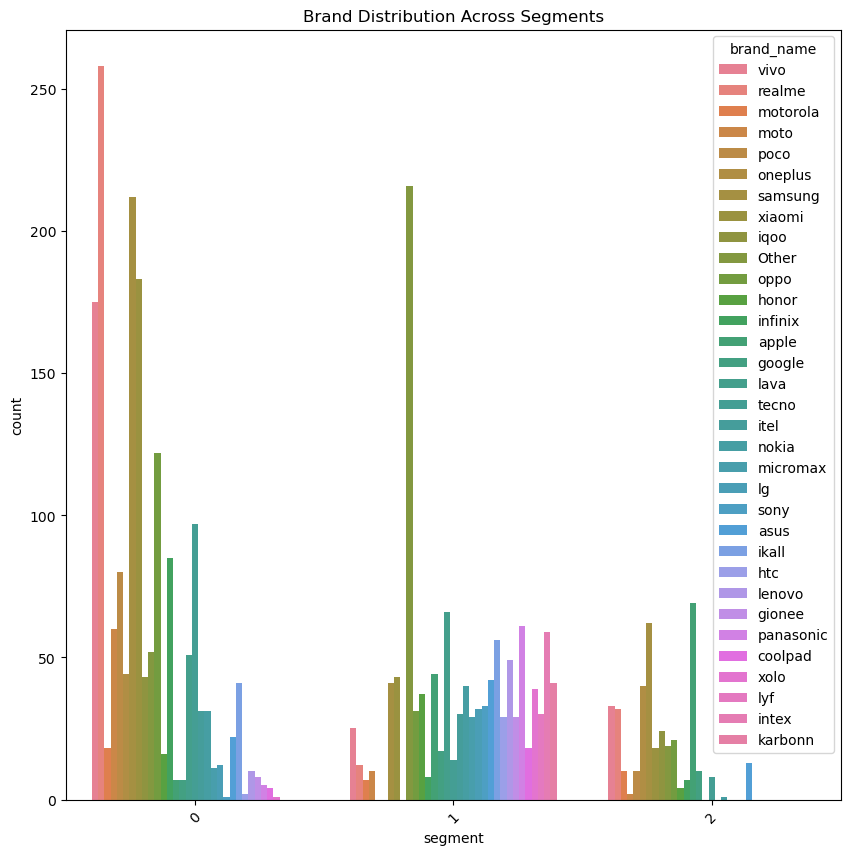

In [18]:
plt.figure(figsize=(10, 10))
sns.countplot(x='segment', hue='brand_name', data=df)

plt.title("Brand Distribution Across Segments")

plt.xticks(rotation=45)

plt.show()

# Outlier Detection using Boxplot

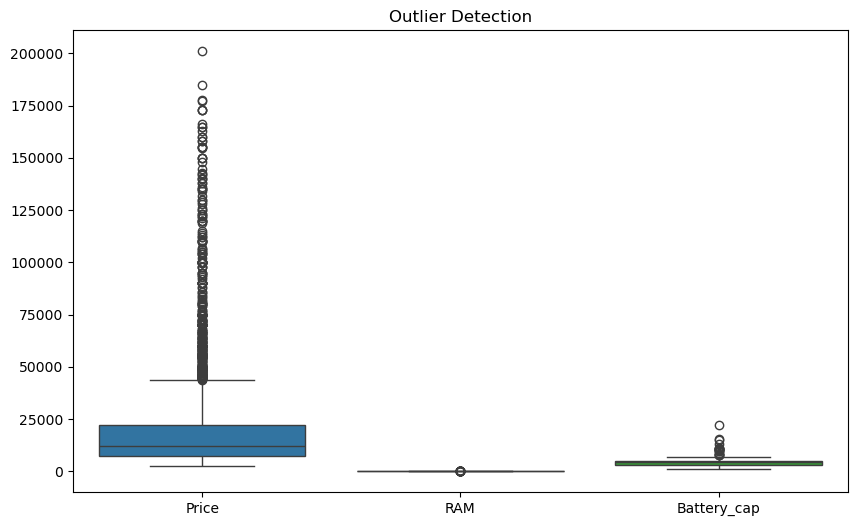

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Price', 'RAM', 'Battery_cap']])
plt.title("Outlier Detection")
plt.show()


# Average Price by Brand

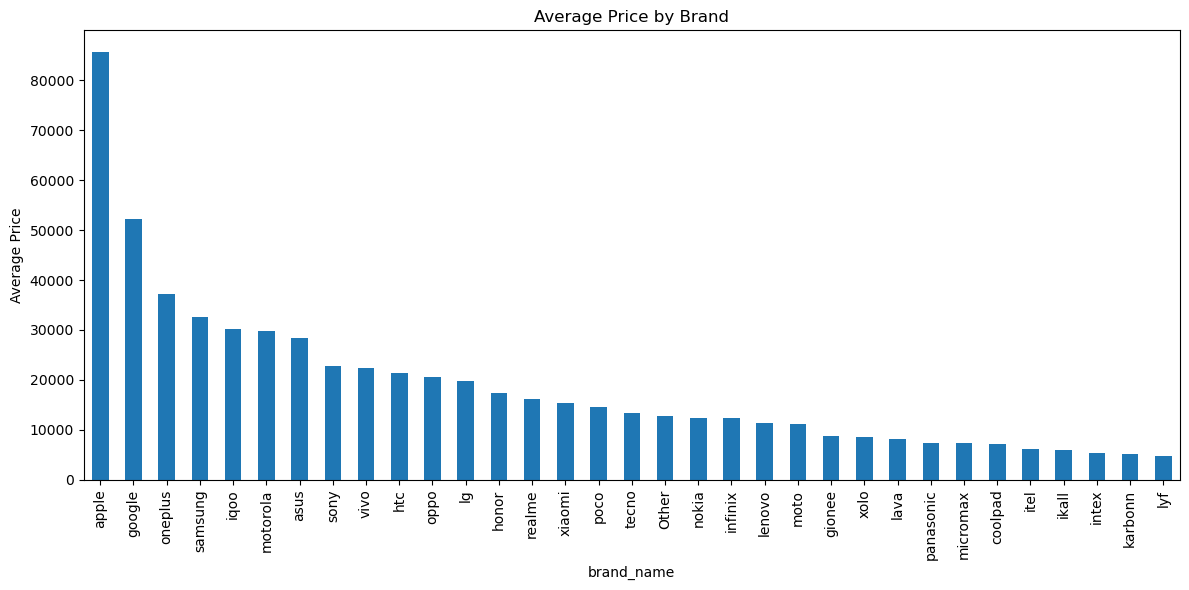

In [20]:
plt.figure(figsize=(12, 6))
df.groupby('brand_name')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average Price by Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#  Summary of Segments

In [21]:
print("Cluster Summary:")
print(df.groupby('segment')[['Price', 'RAM', 'storage', 'Battery_cap']].mean())


Cluster Summary:
                Price        RAM     storage  Battery_cap
segment                                                  
0        16080.197750   5.746596  116.840734  4944.570160
1        10966.547980   2.253157   27.344537  2854.813973
2        66850.130548  10.788512  353.587467  4778.237598
